In [3]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

RESULTS_DIR = 'inference-energy-results/'
MODEL = 'openai_gpt-oss-20b'

In [4]:
active_df = pd.read_csv(os.path.join(RESULTS_DIR, MODEL, 'active.csv'))
idle_df = pd.read_csv(os.path.join(RESULTS_DIR, MODEL, 'idle.csv'))

/tmp/ipykernel_30941/943500806.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


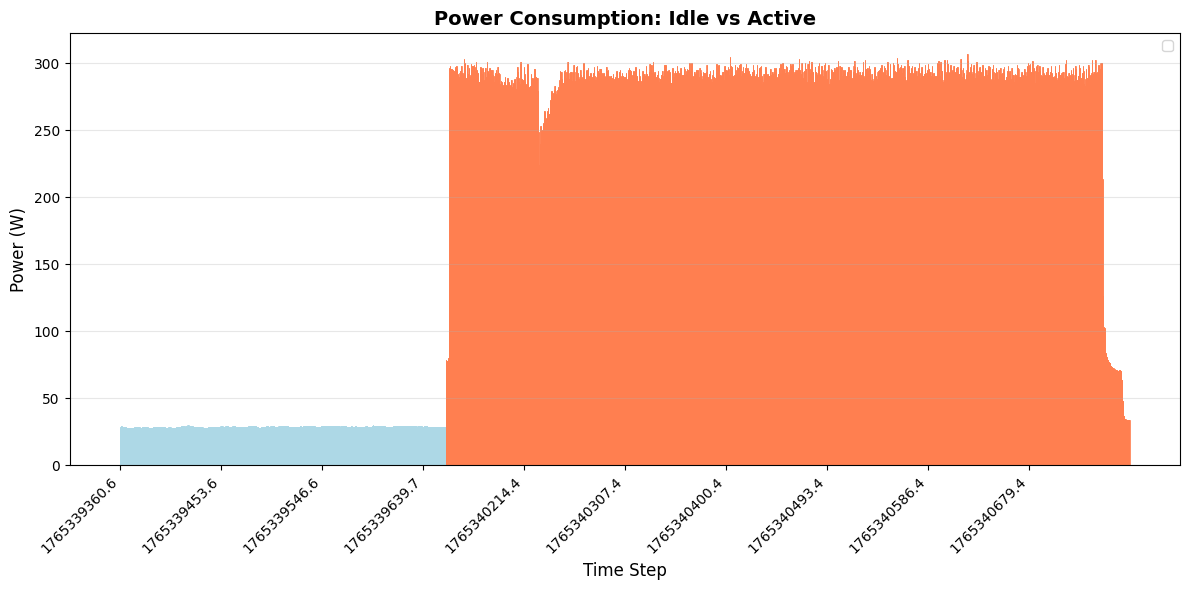

In [8]:
# Add a column to track which phase each row belongs to
idle_df['phase'] = 'idle'
active_df['phase'] = 'active'

# Concatenate idle then active
combined_df = pd.concat([idle_df, active_df], ignore_index=True)

# Create sequential x-axis positions
combined_df['x_pos'] = range(len(combined_df))

# # Find the boundary between idle and active
# boundary_idx = len(idle_df) - 0.5  # Position between last idle and first active

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create bar plot
bars = ax.bar(combined_df['x_pos'], combined_df['power_W'], 
              width=1.0, edgecolor='black', linewidth=0.5)

# Color bars differently for idle vs active
for i, phase in enumerate(combined_df['phase']):
    if phase == 'idle':
        bars[i].set_color('lightblue')
    else:
        bars[i].set_color('coral')

# # Add vertical line at the boundary
# ax.axvline(x=boundary_idx, color='red', linestyle='--', linewidth=2, 
#            label='Active Start')

# Labels and title
ax.set_xlabel('Time Step', fontsize=12)
ax.set_ylabel('Power (W)', fontsize=12)
ax.set_title('Power Consumption: Idle vs Active', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Optional: Set x-axis ticks to show actual timestamps at intervals
n_ticks = 10  # Adjust as needed
tick_positions = range(0, len(combined_df), len(combined_df) // n_ticks)
tick_labels = combined_df['timestamp_s'].iloc[list(tick_positions)].round(1)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()